In [2]:
from os import listdir
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
 
class KangarooDataset(Dataset):
	# load the dataset definitions
	def load_dataset(self, dataset_dir, is_train=True):
		# define one class
		self.add_class("dataset", 1, "crazing")
        self.add_class("dataset", 1, "inclusion")
        self.add_class("dataset", 1, "pathches")
        self.add_class("dataset", 1, "pitted_surface")
        self.add_class("dataset", 1, "rolled-in_scale")
        self.add_class("dataset", 1, "scratches")
		# define data locations
		images_dir = dataset_dir + '/IMAGES/'
		annotations_dir = dataset_dir + '/annotation/'
		# find all images
		for filename in listdir(images_dir):
			# extract image id
#			image_id = filename[:-4]
			# skip bad images
#			if image_id in ['00090']:
#				continue
			# skip all images after 150 if we are building the train set
#			if is_train and int(image_id) >= 150:
#				continue
			# skip all images before 150 if we are building the test/val set
#			if not is_train and int(image_id) < 150:
#				continue
			img_path = images_dir + filename
#			ann_path = annotations_dir + image_id + '.xml'
			# add to dataset
			self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
 
	# extract bounding boxes from an annotation file
	def extract_boxes(self, filename):
        ANNOTS_PATH = r"C:\Users\HPDQ\Mask_RCNN\DATASET\neuDataset\annotation"
        boxes = list()
        for csvPath in paths.list_files(ANNOTS_PATH, validExts=(".csv")):
            rows = open(csvPath).read().strip().split("\n")
            for row in rows:
                row = row.split(",")
                (filename, xmin, ymin, xmax, ymax, label) = row
                coors = [xmin, ymin, xmax, ymax]
                boxes.append(coors)
		width = 200
		height = 200
		return boxes, width, height
 
	# load the masks for an image
	def load_mask(self, image_id):
		# get details of image
		info = self.image_info[image_id]
		# define box file location
		path = info['annotation']
		# load XML
		boxes, w, h = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
		masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
		class_ids = list()
		for i in range(len(boxes)):
			box = boxes[i]
			row_s, row_e = box[1], box[3]
			col_s, col_e = box[0], box[2]
            if(box[4] == "crazing"):
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index('crazing'))
            elif(box[4] == "inclusion"):
                masks[row_s:row_e, col_s:col_e, i] = 2
                class_ids.append(self.class_names.index('inclusion'))
            elif(box[4] == "pathches"):
                masks[row_s:row_e, col_s:col_e, i] = 3
                class_ids.append(self.class_names.index('pathches')) 
            elif(box[4] == "pitted_surface"):
                masks[row_s:row_e, col_s:col_e, i] = 4
                class_ids.append(self.class_names.index('pitted_surface')) 
            elif(box[4] == "rolled-in_scale"):
                masks[row_s:row_e, col_s:col_e, i] = 5
                class_ids.append(self.class_names.index('rolled-in_scale'))
            else(box[4] == "scratches"):
                masks[row_s:row_e, col_s:col_e, i] = 6
                class_ids.append(self.class_names.index('scratches')) 
        return masks, asarray(class_ids, dtype='int32')
 
	# load an image reference
	def image_reference(self, image_id):
		info = self.image_info[image_id]
		return info['path']

In [11]:
from imutils import paths
def extract_boxes():
    ANNOTS_PATH = r"C:\Users\HPDQ\Mask_RCNN\DATASET\neuDataset\annotation"
    boxes = list()
    for csvPath in paths.list_files(ANNOTS_PATH, validExts=(".csv")):
        rows = open(csvPath).read().strip().split("\n")
        for row in rows:
            row = row.split(",")
            (filename, xmin, ymin, xmax, ymax, label) = row
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
    width = 200
    height = 200
    return width
print (extract_boxes())

200


In [ ]:
# train set
train_set = KangarooDataset()
train_set.load_dataset('kangaroo', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
 
# test/val set
test_set = KangarooDataset()
test_set.load_dataset('kangaroo', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

In [12]:
import numpy as np
import os
from mrcnn.utils import Dataset
class SteelDataset(Dataset):
    def load_dataset(self, dataset_dir):
        self.add_class("dataset", 1, "crazing")
        self.add_class("dataset", 1, "inclusion")
        self.add_class("dataset", 1, "pathches")
        self.add_class("dataset", 1, "pitted_surface")
        self.add_class("dataset", 1, "rolled-in_scale")
        self.add_class("dataset", 1, "scratches")

        image_dir = os.path.join(dataset_dir, "IMAGES")
        annotations_dir = os.path.join(dataset_dir, "HRC.csv")
        rows = open(annotations_dir).read().strip().split("\n")
        counter = 0
        boxes = list()
        width = list()
        height = list()
        image_path = list()
        label = list()
        for row in rows:
            row = row.split(",")
            (filename, xmin, ymin, xmax, ymax, _label) = row
            coors = [xmin, ymin, xmax, ymax]
            image_id = counter
            _image_path = os.path.join(image_dir, filename)
            counter = counter + 1
            w = 200
            h = 200
            boxes.append(coors)
            width.append(w)
            height.append(h)
            image_path.append(_image_path)
            label.append(_label)
        return(image_path, label, width, height, boxes)

In [30]:
data = SteelDataset()
dataset_dir = r"C:\Users\HPDQ\Mask_RCNN\DATASET\neuDataset"
image_path, label, width, height, boxes = load_dataset(dataset_dir)

In [31]:

for a in boxes:
    
    print(a)
    

['2', '2', '193', '194']
['60', '20', '194', '69']
['9', '84', '197', '198']
['1', '10', '108', '121']
['35', '1', '200', '83']
['120', '109', '196', '198']
['8', '112', '164', '190']
['40', '12', '187', '152']
['2', '2', '144', '153']
['150', '85', '199', '178']
['1', '18', '130', '99']
['126', '29', '198', '130']
['1', '107', '86', '191']
['4', '4', '110', '136']
['142', '10', '197', '56']
['137', '42', '199', '116']
['4', '3', '113', '134']
['133', '1', '197', '149']
['59', '1', '197', '45']
['1', '24', '127', '101']
['16', '120', '189', '156']
['113', '152', '177', '188']
['112', '46', '199', '138']
['2', '1', '105', '79']
['11', '146', '127', '199']
['3', '21', '69', '149']
['90', '115', '198', '193']
['77', '1', '199', '42']
['39', '38', '198', '87']
['32', '88', '145', '131']
['20', '68', '112', '111']
['85', '12', '193', '70']
['62', '134', '142', '184']
['105', '18', '193', '75']
['1', '16', '89', '79']
['37', '28', '167', '109']
['119', '12', '199', '126']
['14', '44', '123',

['116', '6', '162', '199']
['56', '1', '89', '117']
['2', '8', '37', '148']
['53', '129', '75', '197']
['148', '54', '172', '113']
['84', '6', '107', '88']
['27', '78', '44', '114']
['103', '147', '120', '176']
['27', '1', '54', '167']
['59', '9', '97', '196']
['103', '11', '136', '198']
['139', '1', '172', '181']
['99', '1', '122', '47']
['48', '1', '83', '198']
['86', '1', '111', '155']
['133', '3', '178', '197']
['141', '89', '166', '186']
['143', '11', '158', '39']
['140', '49', '168', '90']
['77', '1', '118', '196']
['30', '2', '70', '197']
['81', '1', '124', '197']
['22', '1', '58', '172']
['79', '1', '108', '90']
['82', '77', '116', '199']
['139', '1', '183', '198']
['9', '1', '51', '180']
['51', '1', '79', '198']
['145', '94', '178', '176']
['99', '104', '123', '168']
['151', '18', '168', '49']
['109', '75', '139', '160']
['61', '88', '83', '149']
['19', '89', '48', '173']
['104', '6', '146', '114']
['143', '94', '164', '136']
['24', '16', '40', '50']
['167', '83', '200', '95']

['81', '66', '133', '128']
['77', '6', '121', '49']
['81', '1', '132', '45']
['86', '72', '131', '161']
['67', '13', '114', '51']
['61', '65', '124', '199']
['123', '39', '168', '136']
['151', '1', '192', '37']
['20', '39', '75', '154']
['143', '1', '187', '23']
['125', '4', '199', '117']
['98', '2', '168', '51']
['1', '1', '45', '28']
['114', '119', '158', '199']
['72', '10', '115', '141']
['160', '161', '195', '189']
['88', '55', '128', '135']
['113', '15', '157', '40']
['17', '140', '66', '189']
['71', '61', '110', '110']
['72', '126', '117', '200']
['143', '146', '199', '200']
['85', '1', '122', '40']
['97', '132', '186', '184']
['106', '71', '197', '168']
['88', '34', '147', '135']
['71', '1', '137', '108']
['70', '118', '137', '183']
['117', '12', '146', '42']
['35', '129', '174', '188']
['72', '30', '164', '117']
['32', '105', '163', '173']
['25', '35', '91', '136']
['69', '5', '177', '69']
['41', '3', '122', '67']
['109', '78', '150', '160']
['87', '77', '169', '154']
['28', '7

In [8]:
import numpy as np
import os
from mrcnn.utils import Dataset
class SteelDataset(Dataset):
    def load_dataset(self, dataset_dir):
        self.add_class("dataset", 1, "crazing")
        self.add_class("dataset", 2, "inclusion")
        self.add_class("dataset", 3, "pathches")
        self.add_class("dataset", 4, "pitted_surface")
        self.add_class("dataset", 5, "rolled-in_scale")
        self.add_class("dataset", 6, "scratches")

        image_dir = os.path.join(dataset_dir, "IMAGES")
        annotations_dir = os.path.join(dataset_dir, "HRC.csv")
        rows = open(annotations_dir).read().strip().split("\n")
        counter = 0
        boxes = list()
        width = list()
        height = list()
        image_path = list()
        label = list()
        #image_id = list()
        for row in rows:
            row = row.split(",")
            (filename, xmin, ymin, xmax, ymax, _label) = row
            coors = [xmin, ymin, xmax, ymax]            
            _image_path = os.path.join(image_dir, filename)
            #image_id.append(counter)
            w = 200
            h = 200
            boxes.append(coors)
            width.append(w)
            height.append(h)
            image_path.append(_image_path)
            label.append(_label)
            
        #return(image_path, label, width, height, boxes)
            self.add_image('dataset', image_id = counter, height = h, width = w, boxes = coors, image_path = _image_path, label = _label)
            counter = counter + 1
    def extract_boxes(self, image_id):
        boxes = list()
        image_dir = os.path.join(dataset_dir, "IMAGES")
        annotations_dir = os.path.join(dataset_dir, "HRC.csv")
        rows = open(annotations_dir).read().strip().split("\n")
        count = 0
        for row in rows:
            row = row.split(",")
            (filename, xmin, ymin, xmax, ymax, _label) = row
            coors = [xmin, ymin, xmax, ymax]            
            #_image_path = os.path.join(image_dir, filename)
            #image_id.append(counter)
            #w = 200
            #h = 200
            #boxes.append(coors)
            #width.append(w)
            #height.append(h)
            #image_path.append(_image_path)
            #label.append(_label)
            if count == image_id:
                coors = [xmin, ymin, xmax, ymax]
                boxes.append(coors)
            count = count + 1
            
        width = 200
        height = 200
        return boxes, width, height
    
    def load_mask(self, image_id):
        info = self.image_info[image_id]
        boxes, w, h = self.extract_boxes(info)
        print(boxes)

        _label = info['label']
        masks = np.zeros([h, w, len(boxes)], dtype='uint8')
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            print (box)
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            row_s = int(row_s)
            row_e = int(row_e)
            col_s = int(col_s)
            col_e = int(col_e)
            i = int(i)
            if(_label == "crazing"):
                print (type(row_s))
                print (type(row_e))
                print (type(col_s))
                print (type(col_e))
                print (type(i))
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index('crazing'))
            elif(_label == "inclusion"):
                masks[row_s:row_e, col_s:col_e, i] = 2
                class_ids.append(self.class_names.index('inclusion'))
            elif(_label == "pathches"):
                masks[row_s:row_e, col_s:col_e, i] = 3
                class_ids.append(self.class_names.index('pathches')) 
            elif(_label == "pitted_surface"):
                masks[row_s:row_e, col_s:col_e, i] = 4
                class_ids.append(self.class_names.index('pitted_surface')) 
            elif(_label == "rolled-in_scale"):
                masks[row_s:row_e, col_s:col_e, i] = 5
                class_ids.append(self.class_names.index('rolled-in_scale'))
            else:
                masks[row_s:row_e, col_s:col_e, i] = 6
                class_ids.append(self.class_names.index('scratches')) 
        return masks, np.asarray(class_ids, dtype='int32')
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

dataset_dir = r"C:\Users\HPDQ\Mask_RCNN\DATASET\neuDataset"
#image_path, label, width, height, boxes = SteelDataset.load_dataset(dataset_dir)
train_set = SteelDataset()
train_set.load_dataset(dataset_dir)


In [3]:
print('Train: %d' % len(train_set.image_ids))

Train: 4189


In [9]:
train_set.prepare()

In [10]:
image_id = 0
image = train_set.load_image(image_id)
print(image.shape)
# load image mask
mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)

(200, 200, 3)
[]
(200, 200, 0)


In [41]:

# load an image
image_id = 20
image = train_set.load_image(image_id)
print(image.shape)
# load image mask
mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)

(200, 200, 3)
[]
(200, 200, 0)


IndexError: index 0 is out of bounds for axis 2 with size 0

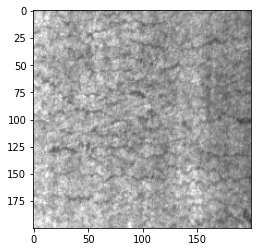

In [5]:
from matplotlib import pyplot
pyplot.imshow(image)
# plot mask
pyplot.imshow(mask[:, :, 0], cmap='gray', alpha=0.5)
pyplot.show()

In [11]:
print (mask.shape)

(200, 200, 0)


In [12]:
mask

array([], shape=(200, 200, 0), dtype=uint8)